<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_week06_1_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 앙상블 학습

# 앙상블 학습 개요

앙상블 학습(Ensenble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다. 어려운 문제의 결론을 내기 위해 여러 명의 전문가로 위원회를 구성해 다양한 의견을 수렴하고 결정하듯이 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것이다.

이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있다. 앙상블 알고리즘의 대표격인 랜덤 포레스트와 그래디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 인해 그간 분석가 및 데이터 과학자들 사이에서 많이 애용됐다. 부스팅 계열의 앙상블 알고리즘의 인기와 강세가 계속 이어져 기존의 그래디언트 부스팅을 뛰어넘는 새로운 알고리즘의 개발이 가속화됐다. 데이터 과학자들이 기량을 겨루는 오픈 플랫폼인 캐글(Kaggle)에서 '매력적인 솔루션'으로 불리는 XGBoost, 그리고 XGBoost와 유사한 예측 성능을 가지면서도 훨씬 빠른 수행 속도를 가진 LightGBM, 여러 가지 모델의 결과를 기반으로 메타 모델을 수립하는 스태킹(Stacking)을 포함해 다양한 유형의 앙상블 알고리즘이 머신러닝의 선도 알고리즘으로 인기를 모으고 있다. XGBoost, LightGBM과 같은 최신의 앙상블 모델 한두 개만 잘 알고 있어도 정형 데이터의 분류나 회귀 분야에서 예측 성능이 매우 뛰어난 모델을 쉽게 만들 수 있다. 그만큼 쉽고 편하면서도 강력한 성능을 보유하고 있는 것이 바로 앙상블 학습의 특징이다.

앙상블 학습의 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있으며, 이 외에도 스태킹을 포함한 다양한 앙상블 방법이 있다. 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 보팅과 배깅의 다른 점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것이다. 대표적인 배깅 방식이 바로 랜덤 포레스트 알고리즘이다.

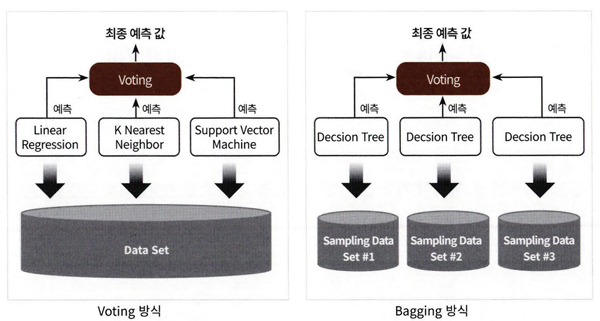

왼쪽 그림은 보팅 분류기를 도식화한 것이다. 선형 회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정하는 방식이다.

오른쪽 그림은 배깅 분류기를 도식화한 것이다. 단일 ML 알고리즘(결정 트리)으로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅 방식과는 다르다. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 부른다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 해서 최종 예측 결과를 선정하는 방식이 바로 배깅 앙상블 방식이다. 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용한다. 따라서 10000개의 데이터를 10개의 분류기가 배깅 방식으로 나누더라도 각 1000개의 데이터 내에는 중복된 데이터가 있다.

부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것이다. 계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행하기에 부스팅 방식으로 불린다. 예측 성능이 뛰어나 앙상블 학습을 주도하고 있으며 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)이 있다.

스태킹은 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법이다.

# 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

보팅 방법에는 두 가지가 있다. 하드 보팅과 소프트 보팅이다. 하드 보팅을 이용한 분류(Classification)는 다수결 원칙과 비슷하다. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것이다. 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정한다. 일반적으로 소프트 보팅이 보팅 방법으로 적용된다.

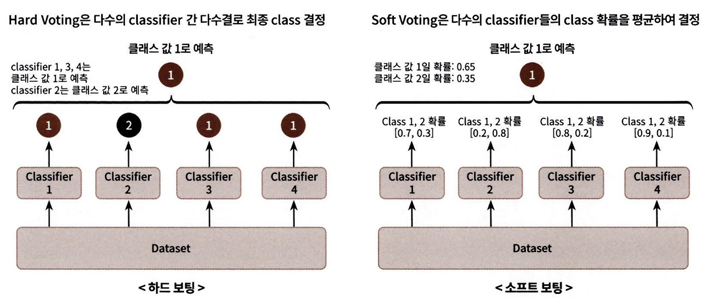

왼쪽 그림은 하드 보팅이다. Classifier 1번, 2번, 3번, 4번인 4개로 구성한 보팅 앙상블 기법에서 분류기 1번, 3번, 4번이 1로 레이블 값을 예측하고 분류기 2번이 2로 레이블 값을 예측하면 다수결 원칙에 따라서 최종 예측은 1이 된다.

오른쪽 그림은 소프트 보팅이다. 소프트 보팅은 각 분류기의 레이블 값 예측 확률을 평균 내어 최종 결정한다. 가령 분류기 1의 레이블 값 1과 2의 예측 확률이 각각 0.7/0.3이고 분류기 2번은 0.2/0.8, 분류기 3번은 0.8/0.2, 분류기 4번은 0.9/0.1이라면 레이블 값 1의 평균 예측 확률은 분류기 1번, 2번, 3번, 4번의 확률을 모두 더하여 평균하면 (0.7+0.2+0.8+0.9)/4=0.65가 된다. 레이블 값 2의 평균 예측 확률도 같은 방법으로 계산하면 (0.3+0.8+0.2+0.1)/4=0.35가 된다. 따라서 레이블 1값의 확률이 0.65로 레이블 값 2인 확률 0.35보다 크므로 레이블 값 1로 최종 보팅하는 것이 소프트 보팅이다. 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아서 더 많이 사용된다.

# 보팅 분류기(Voting Classifier)

사이킷런은 보팅 양식의 앙상블을 구현한 VotingClassifier 클래스를 구현하고 있다.

보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석해 보자. 위스콘신 유방암 데이터 세트는 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트이며 종야의 크기, 모양 등의 형태와 관련한 많은 피처를 가지고 있다. 사이킷런은 load_breast_cancer() 함수를 통해 자체에서 위스콘신 유방암 데이터 세트를 생성할 수 있다.

로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어 보자. 먼저 필요한 모듈과 데이터를 로딩한 후 위스콘신 데이터 세트를 간략히 살펴보자.


In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들어 보겠다. 사이킷런은 VotingClassifier 클래스를 이용해 보팅 분류기를 생성할 수 있다. VotingClassifier 클래스는 주요 생성 인자로 estimators와 voting 값을 입력받는다. estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받으며 voting은 'hard'시 하드 보팅, 'soft'시 소프트 보팅 방식을 적용하라는 의미이다(기본은 'hard'이다).

In [5]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


보팅 분류기가 정확도가 조금 높게 나타났는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않는다. 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을 수도 있다.

그럼에도 불구하고 지금 소개하는 보팅을 포함해 배깅과 부스팅 등의 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다. 고정된 데이터 세트에서 단일 ML 알고리즘이 뛰어난 성능을 발휘하더라도 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성돼 있다. 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 끌어낼 수 있다.

ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 된다. 이런 관점에서 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요 과제이다. 보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하고 있지만, 배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 한다. 결정 트리 알고리즘은 쉽고 직관적인 분류 기준을 가지고 있지만 정확한 예측을 위해 학습 데이터의 예외 상황에 집착한 나머지 오히려 과적합이 발생해 실제 테스트 데이터에서 예측 성능이 떨어지는 현상이 발생하기 쉽다. 하지만 앙상블 학습에서는 이 같은 결정 트리 알고리즘의 단점을 수십~수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복하고 있다. 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프의 효과를 극대화할 수 있다는 것이다.

# 04 랜덤 포레스트

# 랜덤 포레스트의 개요 및 실습

배깅(Bagging)은 보팅과 다르게, 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘이다. 배기의 대표적인 알고리즘은 랜덤 포레스트이다. 랜덤 포레스트는 다재 다능한 알고리즘이다. 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보이고 있다. 랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있다(랜덤 포레스트뿐만 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반 알고리즘으로 채택하고 있다).

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.


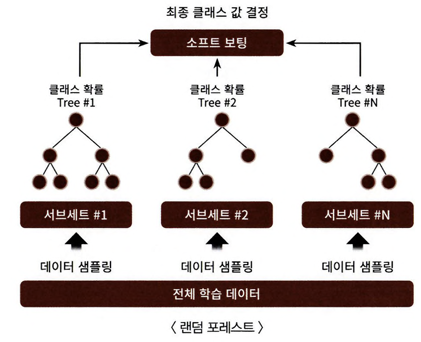

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터 세트에서 일부가 중첩되게 샘플링된 데이터 세트이다. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 한다(그래서 배깅(Bagging)이 bootstrap aggregating의 줄임말이다). 원래 부트스트랩은 통계학에서 여러 개의 작은 데이터 세트를 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식을 지칭한다. 랜덤 포레스트의 서브세트(Subset) 데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어진다. 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어진다. 원본 데이터의 건수가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimator=3으로 하이퍼 파라미터를 부여하면 다음과 같이 데이터 서브세트가 만들어진다.

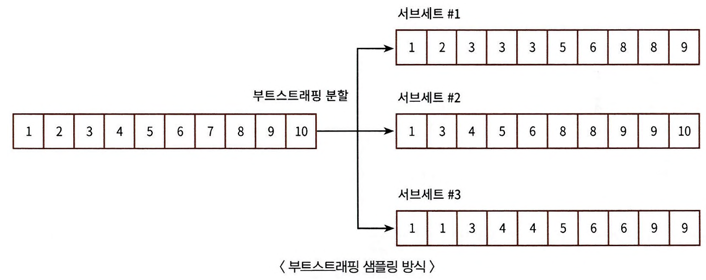

이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트이다. 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원한다. 앞의 사용자 행동 인식 데이터 세트를 RandomForestClassifier를 이용해 예측해 보자(재 수행할 때마다 동일한 예측 결과를 출력하기 위해 RandomForestClassifier의 random_state를 0으로 설정하자). 새로운 주피터 노트북을 생성하되, 앞의 결정 트리를 이용한 사용자 행동 인식 예측에서 사용한 주피터 노트부과 같은 디렉터리에 생성하겠다. 사용자 행동 데이터 세트에 DataFrame을 반환하는 get_human_dataset()를 이용하기 위해서이다. get_human_dataset()를 이용해 학습/테스트용 DataFrame을 가져온다.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset():
    feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


# 랜덤 포레스트 하이퍼 파라미터 및 튜닝

트리 기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모된다는 것이다. 그나마 랜덤 포레스트가 적은 편에 속하는데, 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문이다.

* n_estimator: 랜덤 포레스트에서 결정 트리의 개수를 지정한다. 디폴트는 10개이다. 많이 설정할수록 좋은 성는을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아니다. 또한 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 한다.

* max_features는 결정 트리에 사용된 max_features 파라미터와 같다. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같다. 따라서 랜덤 포레스트의 트리를 분한하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조한다(전체 피처가 16개라면 분할을 위해 4개 참조).

* max_depth나 min_samples_leat, min_samples_split와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있다.

이번에는 GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해 보자. 앞의 사용자 행동 데이터 세트를 그대로 이용하고, 튜닝 시간을 절약하기 위해 n_estimators는 100으로, CV를 2로만 설정해 최적 하이퍼 파라미터를 구해 보자.

랜덤 포레스트는 CPU 병렬 처리도 효과적으로 수행되어 빠른 학습이 가능하기 때문에 뒤에 소개할 그래디언트 부스팅보다 예측 성능이 약간 떨어지더라도 랜덤 포레스트로 일단 기반 모델을 먼저 구축하는 경우가 많다. 멀티 코어 환경에서는 다음 예제에서 RandomForestClassifier 생성자와 GridSearchCV 생성 시 n_jobs=—1 파라미터를 추가하면 모든 CPU 코어를 이용해 학습할 수 있다.

In [10]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth': [8, 16,24],
    'min_samples_leaf': [1,6,12],
    'min_samples_split': [2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도: 0.9157


max_depth: 16, min_samples_leaf: 6, min_samples_split: 2일 때 2개의 CV 세트에서 약 91.65%의 평균 정확도가 측정됐다. 이렇게 추출된 최적 하이퍼 파라미터로 다시 RandomForestClassifier를 학습시킨 뒤에 이번에는 별도의 테스트 데이터 세트에서 예측 성능을 측정해 보겠다.

In [11]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9253


별도의 테스트 데이터 세트에서 수행한 예측 정확도 수치는 약 92.60%이다. RandomForestClassifier 역시 DecisionTreeClassifier와 똑같이 feature_importances_ 속성을 이용해 알고리즘이 선택한 피처의 중요도를 알 수 있다. 이 피처 중요도를 막대그래프로 시각화해 보겠다.

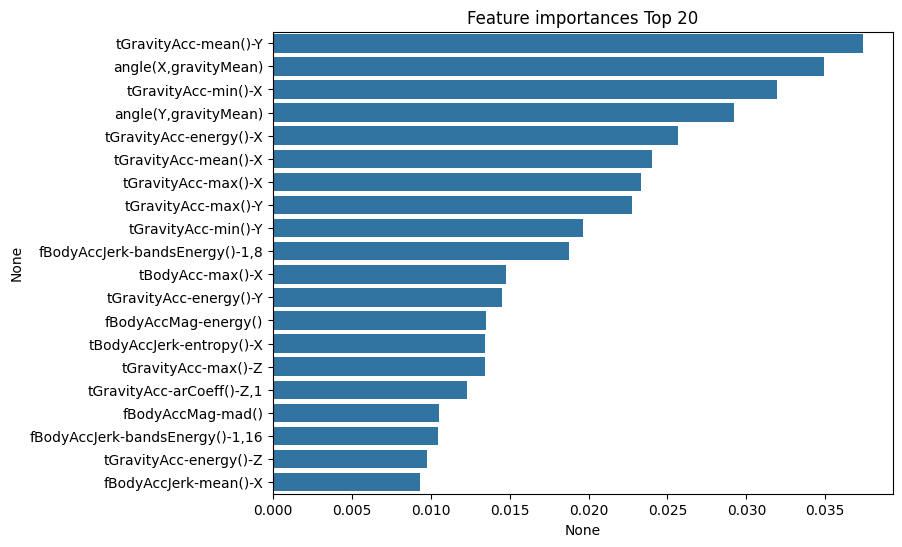

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

angle(X,gravityMean), tGravityAcc-mean()-Y, tGravityAcc-min()-X 등이 높은 피처 중요도를 가지고 있다.

# 05 GBM(Gradient Boosting Machine)

# GBM의 개요 및 실습

부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다. 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있다. 에이다 부스트(AdaBoost)는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다. 먼저 다음 그림을 통해 에이다부스트가 어떻게 학습을 진행하는지 알아보자.

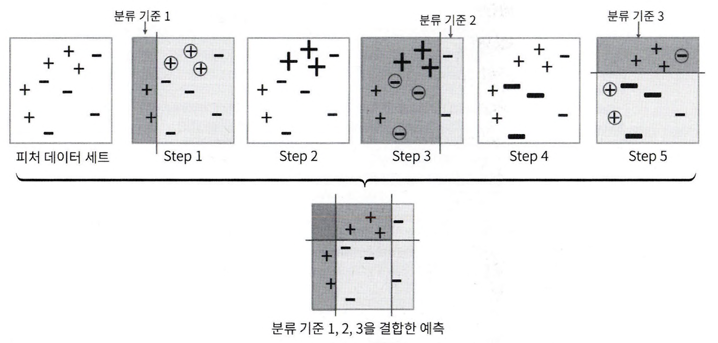

맨 왼쪽 그림과 같이 +와 -로 된 피처 데이터 세트가 있다면

* Step 1은 첫 번째 약한 학습기(weak learner)가 분류 기준 1로 +와 -를 분류한 것이다. 동그라미로 표시된 데이터는 + 데이터가 잘못 분류된 오류 데이터이다.

* Step 2에서는 이 오류 데이터에 대해서 가중치 가중치 값을 부여한다. 가중치가 부여된 오류 + 데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커졌다.

* Step 3은 두 번째 약한 학습기가 분류 기준 2로 +와 -를 분류했다. 마찬가지로 동그라미로 표시된 - 데이터는 잘못 분류된 오류 데이터이다.

* Step 4에서는 잘못 분류된 이 - 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치를 부여한다. (오류 - 데이터의 크기가 커짐).

* Step 5에서는 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터를 찾는다. 에이다부스트는 이렇게 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행한다.

* 마지막으로 맨 아래에는 첫 번째, 두 번째, 세 번째 약한 학습기를 모두 결합한 결과 예측이다. 개별 약한 학습기보다 훨씬 정확도가 높아졌음을 알 수 있다.


개별 약한 학습기는 다음 그림과 같이 각각 가중치를 부여해 결합한다. 예를 들어 첫 번째 학습기에 가중치 0.3, 두 번째 학습기에 0.5, 세 번째 학습기에 가중치 0.8을 부여한 후 모두 결합해 예측을 수행한다.


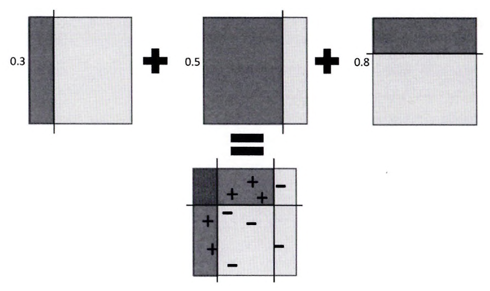

GBM(Gradient Boost Machine)도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이이다. 오류 값은 실제 값 - 예측값이다. 분류의 실제 결괏값을 y, 피처를 x1, x2,...xn, 그리고 이 피처에 기반한 예측 함수를 F(x) 함수라고 하면 오류식은 h(x)=y-F(x)이 된다. 이 오류식 h(x)=y-F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사 하강법(Gradient Descent)이다. 이 경사 하강법은 머신러닝에서 중요한 기법 중 하나이다.

GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류는 물론이고, 회귀도 가능하다. 사이킷런은 GBM 기반의 분류를 위해서 GradientBoostingClassifier 클래스를 제공한다. 사이킷런의 GBM을 이용해 사용자 행동 데이터 세트를 예측 분류해 보자. 또한 GBM으로 학습하는 시간이 얼마나 걸리는지 수행 시간도 같이 측정해 보자. 앞의 랜덤 포레스트의 예제에서 사용한 주피터 노트북에 이어서 예제 코드를 작성하며, get_human_dataset() 함수로 데이터 세트를 가져오겠다.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0.1f} 초".format(time.time()-start_time))

GBM 정확도: 0.9379


AttributeError: 'float' object has no attribute '1f'

기본 하이퍼 파라미터만으로 93.89%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냈다. 그렇지 않은 경우도 있겠지만, 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많다. 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요하다. 특히 수행 시간 문제는 GBM이 극복해야 할 중요한 과제이다.  사이킷런의 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬
처리가 지원되지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요하다. 반면에 랜덤 포레스트의 경우 상대적으로 빠른 수행 시간을 보장해주기 때문에 더 쉽게 예측 결과를 도출할 수 있다.

# GBM 하이퍼 파라미터 소개

n_estimators, max_depth, max_features와 같은 트리 기반 자체의 파라미터는 설명을 생략

* loss: 경사 하강법에서 사용할 비용 함수를 지정한다. 특별한 이유가 없으면 기본값인 'deviance'를 기대로 적용한다.

* learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률이다. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수이다. 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1이다. 너무 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높다. 하지만 많은 weak learner는 순차적인 반복이 필요해서 수행 시간이 오래 걸리고, 또 너무 작게 설정하면 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있다. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능하다. 이러한 특성 때문에 learning_rate는 n_estimators와 상호 보완적으로 조합해 사용한다. learning_rate를 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있다. 하지만 수행 시간이 너무 오래 걸리는 단점이 있으며, 예측 성능 역시 현격히 좋아지지는 않는다.

* n_estimators: weak learner의 개수입니다. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있다. 하지만 개수가 많을수록 수행 시간이 오래 걸린다. 기본값은 100이다.

* subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율이다. 기본값은 1이며, 이는 전체 학습 데이터를
기반으로 학습한다는 의미이다(0.5이면 학습 데이터의 50%). 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정한다.

GBM에서 GridSearchCV# 이용하여 하이퍼 파라미터 튜닝 실습은 수행 시간이 너무 오래 걸리는 관계로 건너 뛰도록 하겠다. GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘입니다. 하지만 수행 시간이 오래 걸린다는 단점이 있다. GBM이 처음 소개된 이후에 많은 알고리즘이 GBM을 기반으로 새롭게 만들어지고 있습니다. 이 중 머신러닝 세계에서 가장 각광을 받고 있는 두 개의 그래디언트 부스팅 기반 ML 패키지는 XGBoost와 LightGBM입니다. 먼저 XGBoost부터 자세히 알아보자.

# 06 XGBoost(eXtra Gradient Boost)

XGBoost 개요

XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이다. 압도적인 수치의 차이는 아니지만, 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타낸다. XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결해서 매우 각광을 받고 있다. 특히 XGBoost는 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있다. 다음은 XGBoost의 주요 장점이다.

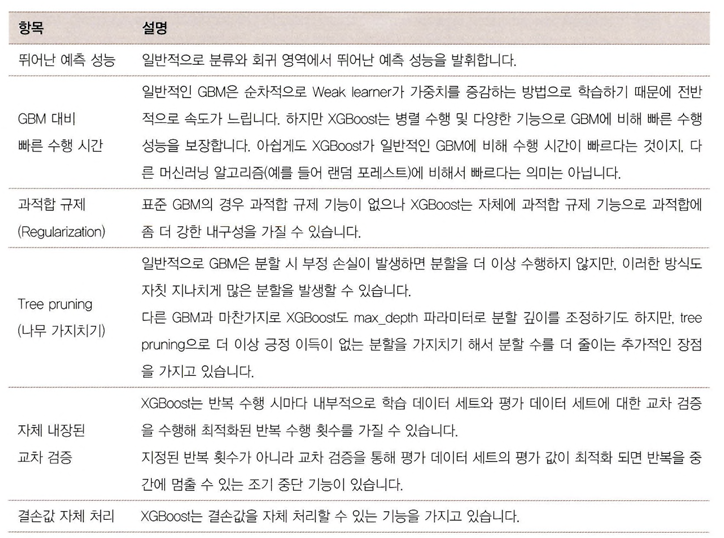

XGBoost의 핵심 라이브러리는 C/C++로 작성돼 있다. XGBoost 개발 그룹은 파이썬에서도 XGBoost를 구동할 수 있도록 파이썬 패키지를 제공한다. 이 파이썬 패키지의 역할은 대부분 C/C++ 핵심 라이브러리를 호출하는 것이다. XGBoost의 파이썬 패키지명은 “xgboost”이다. 이 xgboost 패키지 내에는 XGBoost 전용의 파이썬 패키지와 사이킷런과 호환되는 래퍼용 XGBoost가 함께 존재한다. xgboost 파이썬 패키지는 초기 출시에는 사이킷런과 호환되지 않는 독자적인 XgBoost 전용의 패키지였다. 즉, XGBoost 고유의 프레임워크를 파이썬 언어 기반에서 구현한 것으로 별도의 API 기반이었다. 사이킷런 프레임워크를 기반으로 한 것이 아니기에 사이킷런의 fit(), predict() 메서드와 같은 사이킷런 고유의 아키텍처가 적용될 수 없으며, 다양한 유틸리티(cross_val_score, GridSearchCV, Pipeline 등)와 함께 사용될 수 없었다.

워낙 파이썬 기반의 머신러닝 이용자들이 사이킷런을 많이 사용하고 있었기 때문에 XGBoost 개발 그룹은 사이킷런과 연동할 수 있는 래퍼 클래스(Wrapper class)를 제공하기로 했다. XGBoost 패키지의 사이킷런 래퍼 클래스는 XGBClassifier와 XGBRegressor이다. 이를 이용하면 사이킷런 estimator가 학습을 위해 사용하는 fit()과 predict()와 같은 표준 사이킷런 개발 프로세스 및 다양한 유틸리티를 활용할 수 있다.

구분을 위해서 초기의 독자적인 XGBoost 프레임워크 기반의 XGBoost를 **파이썬 래퍼 XGBoost 모듈**, 사이킷런과 연동되는 모듈을 **사이킷런 래퍼 XGBoost 모듈**이라고 지칭하겠다.

사이킷런 래퍼 XGBoost 모듈은 사이킷런의 다른 Estimator와 사용법이 같은 데 반해 파이썬 네이티브 XGBoost는 고유의 API와 하이퍼 파라미터를 이용한다. 크게 다르지는 않지만, 몇 가지 주의할 점이 있다.

# XGBoost 설치하기
XGBoost는 pip을 이용해 쉽게 설치할 수 있다.


# 파이썬 래퍼 XGBoost 하이퍼 파라미터
GBM(Gradient Boosting Machine)의 하이퍼 파라미터를 어느 정도 이해했으면 XGBoost 하이퍼 파라미터도 이해하는 데 큰 어려움이 없을 것다. XGBoost는 GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며, 여기에 조기 중단(early stopping), 과적합을 규제하기 위한 하이퍼 파라미터 등이 추가됐다.

파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼 파라미터는 약간 다르므로 이에 대한 주의가 필요하다. 정확히 표현하자면 동일한 기능을 의미하는 하이퍼 파라미터이지만, 사이킷런 파라미터의 범용화된 이름 규칙(Naming Rule) 에 따라 파라미터 명이 달라진다. 파이썬 래퍼 XGBoost의 하이퍼 파라미터를 알아보고 나서 사이킷런 래퍼 XGBoost 하이퍼 파라미터가 어떻게 다른지 알아보겠다.

파이썬 래퍼 XGBoost 하이퍼 파라미터를 유형별로 나누면 다음과 같다.

* 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없다.

* 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭한다.

* 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터이다.

대부분의 하이퍼 파라미터는 Booster 파라미터에 속한다.


뛰어난 알고리즘일수록 파라미터를 튜닝할 필요가 적다. 그리고 파라미터 튜닝에 들이는 공수 대비 성능 향상 효과가 높지 않은 경우가 대부분이다. 파라미터를 튜닝하는 경우의 수는 여러 가지 상황에 따라 달라진다. 피처의 수가 매우 많거나 피처 간 상관되는 정도가 많거나 데이터 세트에 따라 여러 가지 특성이 있을 수 있다.

과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있다.

* eta 값을 낮춘다(0.01~0.1). eta 값을 낮출 경우 num+round(또는 n_estimators)는 반대로 높여줘야 한다.
* max_depth 값을 낮춘다.
* min_child_seight 값을 높인다.
* gamma 값을 높인다.
* 또한 sibsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있다.


XGBoost 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있다. 또한 XGBoost는 기본 GBM에서 부족한 다른 여러 가지 성능 향상 기능이 있다. 그중에 수행 속도를 향상시키기 위한 대표적인 기능으로 조기 중단(Early Stopping) 기능이 있다. 기본 GBM의 경우 n_estimators(또는 num_boost_rounds)에 지정된 횟수만큼 반복적으로 학습 오류를 감소시키며 학습을 진행하면서 중간에 반복을 멈출 수 없고 n_estimators에 지정된 횟수를 다 완료해야 한다. XGBoost, 그리고 뒤에서 소개할 LightGBM은 모두 조기 중단 기능이 있어서 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선할 수 있다.

예를 들어 n_estimators를 200으로 설정하고 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 반복하다가 50회를 반복하는 동안 학습 오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료한다(가령 100회에서 학습 오류 값이 0.8인데, 101〜 150회 반복하는 동안 예측 오류가 0.8보다 작은 값이 하나도 없으면 부스팅을 종료한다).

XGBoost의 버전은 다음과 같이 확인할 수 있다.

In [14]:
import xgboost

print(xgboost.__version__)

3.0.5


# 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

이번 절에서는 위스콘신 유방암 데이터 세트를 활용하여 파이썬 래퍼 XGBoost API의 사용법을 살펴보겠다. XGBoost의 파이썬 패키지인 xgboost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화(plotting) 기능을 가지고 있다. 또한 조기 중단 기능이 있어서 num_rounds로 지정한 부스팅 반복 횟수에 도달하지 않더라도 더 이상 예측 오류가 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선하는 기능도 가지고 있다. 일반적으로 수행 성능 향상 XGBoost는 GBM와는 다르게 병렬 처리와 조기 중단 등으로 빠른 수행시간 처리가 가능하지만, CPU 코어가 많지 않은 개인용 PC에서는 수행시간 향상을 경험하기 어려울 수도 있다.

위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트다. 종양은 양성 종양(benign tumor)과 악성 종양(malignant tumor)으로 구분할 수 있으며, 양성 종양이 비교적 성장 속도가 느리고 전이되지 않는 것에 반해, 악성 종양은 주위 조직에 침입하면서 빠르게 성장하고 신체 각 부위에 확산되거나 전이되어 생명을 위협한다. 위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라 악성종양(malignant) 인지 일반 양성종양(benign) 인지를 XGBoost를 이용해 예측해 보겠다.

새로운 주피터 노트북을 생성한 뒤에 xgboost 모듈을 로딩하고 xgb로 명명하겠다. xgboost 패키지는 피처의 중요도를 시각화해주는 모듈인 plotjmportance를 함께 제공한다. 이를 이용해 나중에 피처 중요도를 시각화해 보겠다. 위스콘신 유방암 데이터 세트는 사이킷런에도 내장돼 있으며 이를 위해 load_breast_cancer()를 호출하면 된다. 해당 데이터를 DataFrame으로 로드 후 일부를 살펴보겠다.

In [15]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


종양의 크기와 모양에 관련된 많은 속성이 숫자형 값으로 돼 있다. 타깃 레이블 값의 종류는 악성인 'malignment'가 0 값으로, 양성인 'benign'이 1 값으로 돼 있다. 레이블 값의 분포를 확인해 보겠다.

In [16]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


1 값인 양성 benign이 357개, 0 값인 악성 malignant가 212개로 구성돼 있다.

위스콘신 유방암 데이터 세트의 80%를 학습용으로, 20%를 테스트용으로 추출한 뒤 이 80%의 학습용 데이터에서 90%를 최종 학습용, 10%를 검증용으로 분할하겠다. 여기서 검증용 데이터 세트를 별도로 분할하는 이유는 XGBoost가 제공하는 기능인 검증 성능 평가와 조기 중단(early stopping)을 수행해 보기 위함이다. cancer_df의 맨 마지막 칼럼이 레이블이므로 피처용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출하겠다.

In [17]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features=cancer_df.iloc[:,:-1]
y_label=cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val=train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


전체 569개의 데이터 세트에서 최종 학습용 409개, 검증용 46개, 테스트용 114개가 추출되었다.

파이썬 래퍼 XGBoost는 사이킷런과 여러 가지 차이가 있지만, 먼저 눈에 띄는 차이는 XGBoost만의 전용 데이터 객체인 DMatrix를 사용한다는 점이다. 때문에 Numpy 또는 Pandas로 되어 있는 학습용, 검증, 테스트용 데이터 세트를 모두 전용의 데이터 객체인 DMatrix로 생성하여 모델에 입력해 줘야 한다. XGBoost 초기 버전은 주로 넘파이를 입력 파라미터를 받아서 DMatrix를 생성하였지만, 현 버전은 넘파이 외에도 DataFrame과 Series 기반으로도 DMatrix를 생성할 수 있다. DMatrix의 주요 입력 파라미터는 data와 label이다. data는 피처 데이터 세트이며, label은 분류의 경우에는 레이블 데이터 세트, 회귀의 경우는 숫자형인 종속값 데이터 세트이다.

DMatrix는 넘파이, DataFrame, Series외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환할 수 있다. 과거 버전의 XGBoost에서 판다스의 DataFrame과 호환되지 않아서 DMatrix 생성 시 오류가 발생할 경우에는 DataFrame.values를 이용해 넘파이로 일차 변환한 뒤에 이를 이용해 DMatrix 변환을 적용해야 한다. 다음은 DataFrame 기반의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환하는 예제이다.

In [18]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr=xgb.DMatrix(data=X_tr, label=y_tr)
dval=xgb.DMatrix(data=X_val, label=y_val)
dtest=xgb.DMatrix(data=X_test, label=y_test)

파이썬 래퍼 XGBoost 모듈인 xgboost를 이용해 학습을 수행하기 전에 먼저 XGBoost의 하이퍼 파라미터를 설정한다. XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력한다. 다음과 같은 하이퍼 파라미터 설정을 딕셔너리 형태로 만들어 보겠다.

* max_depth(트리 최대 깊이)는 3.
* 학습률 eta 는 0.1(XGBCIassifier를 사용할 경우 eta가 아니라 learning_rate 이다).
* 예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(binarylogistic).
* 오류 함수의 평가 성능 지표는 logloss.
* num_rounds(부스팅 반복 횟수)는 400회

In [19]:
params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

이제 위에 지정된 하이퍼 파라미터로 XGBoost 모델을 학습시켜보겠다. 파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터로 전달한다(사이킷런의 경우는 Estimator의 생성자를 하이퍼 파라미터로 전달하는 데 반해 차이가 있다). 학습 시 XGBoost는 수행 속도를 개선하기 위해서 조기 중단 기능을 제공한다. 앞에서도 설명했듯이 조기 중단은 XGBoost가 수행 성능을 개선하기 위해서 더 이상 지표 개선이 없을 경우에 num_boost_round 횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것이다.

조기 중단의 성능 평가는 주로 별도의 검증 데이터 세트를 이용한다. XGBoost는 학습 반복 시마다 검증 데이터 세트를 이용해 성능을 평가할 수 있는 기능을 제공한다. 조기 중단은 xgboost의 train() 함수에 early_stopping_rounds 파라미터를 입력하여 설정한다. 여기서는 조기 중단 할 수 있는 최소 반복 횟수를 50으로 설정하겠다.

early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 평가용 데이터 세트 지정과 eval_metric을 함께 설정해야 한다. Xgboost는 반복마다 지정된 평가용 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정한다.

* 평가용 데이터 세트는 학습과 평가용 데이터 세트를 명기하는 개별 튜플을 가지는 리스트 형태로 설정. 가령 dtr이 학습용, dval이 평가용이라면 [(dtr,‘train),(dval’eval)]와 같이, 학습용 DMatirx는 'train으로, 평가용 Dmatrix는 'eval'로 개별 튜플에서 명기하여 설정.
* eval_metric은 평가 세트에 적용할 성능 평가 방법. 분류일 경우 주로 'error'(분류 오류), 'logloss'를 적용.

이제 xgboost 모듈의 train() 함수를 호출하면 학습을 수행해 보겠다. 평가용 데이터 세트 설정은 [(dtr,‘train),(dval,'eval')]와 같이 학습용 DMatrix인 dtr과 검증용 DMatrix인 dval로 설정한 뒤 train() 함수의 evals 인자값으로 입력합니다. eval_metric는 위에서 params 딕셔너리로 지정되었다. Xgboost 학습 반복 시마다 evals에 설정된 데이터 세트에 대해 평가 지표 결과가 출력된다. train()은 학습이 완료된 모델 객체를 반환한다.

In [20]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기한다.
eval_list=[(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')]만 명기해도 무방.

# 하이퍼 파라미터의 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)


[0]	train-logloss:0.62473	eval-logloss:0.63088
[1]	train-logloss:0.58662	eval-logloss:0.60461
[2]	train-logloss:0.55210	eval-logloss:0.58205
[3]	train-logloss:0.52068	eval-logloss:0.56165
[4]	train-logloss:0.49173	eval-logloss:0.54101
[5]	train-logloss:0.46517	eval-logloss:0.52206
[6]	train-logloss:0.44009	eval-logloss:0.50271
[7]	train-logloss:0.41646	eval-logloss:0.48606
[8]	train-logloss:0.39505	eval-logloss:0.46961
[9]	train-logloss:0.37523	eval-logloss:0.45485
[10]	train-logloss:0.35682	eval-logloss:0.44120
[11]	train-logloss:0.33964	eval-logloss:0.43123
[12]	train-logloss:0.32279	eval-logloss:0.41962
[13]	train-logloss:0.30783	eval-logloss:0.40848
[14]	train-logloss:0.29308	eval-logloss:0.39857
[15]	train-logloss:0.27928	eval-logloss:0.38945
[16]	train-logloss:0.26681	eval-logloss:0.38171
[17]	train-logloss:0.25498	eval-logloss:0.37381
[18]	train-logloss:0.24352	eval-logloss:0.36656
[19]	train-logloss:0.23307	eval-logloss:0.36014
[20]	train-logloss:0.22290	eval-logloss:0.35395
[2

train()으로 학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소하고 있다. 하지만 num_boost_round를 400회로 설정했음에도 불구하고 학습은 400번을 반복하지 않고 0부터 시작하여 176번째 반복에서 완료헀음을 알 수 있다. 출력 결과를 자세히 들여다보면 126번째 반복에서 eval-logloss로 표시되는 검증 데이터에 대한 logloss 값이 0.25587로 가장 낮다. 이후 126번에서 176번까지 early_stopping_rounds로 지정된 50회 동안 logloss 값은 이보다 향상되지 않았기 때문에(logloss가 작을수록 성능이 좋다) 더 이상 반복하지 않고 멈춘 것이다.

xgboost를 이용해 모델의 학습이 완료됐으면 이를 이용해 테스트 데이터 세트에 예측을 수행해 보겠다. 파이썬 래퍼 XGBoost는 train( ) 함수를 호출해 학습이 완료된 모델 객체를 반환하게 되는데, 이 모델 객체는 예측을 위해 predict() 메서드를 이용한다. 한 가지 유의할 점은 사이킷런의 predict() 메서드는 예측 결과 클래스 값(즉, 0, 1)을 반환하는 데 반해 xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환한다는 것이다. 본 예제는 암이 악성인지, 양성인지를 판단하는 이진 분류이므로 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정하는 로직을 추가하면 된다.

In [21]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.776 0.058 0.975 1.    0.999 0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


3장 평가에서 생성한 get_clf_eval() 함수를 적용해 XGBoost 모델의 예측 성능을 평가해 보겠다. 테스트 실제 레이블 값을 가지는 y_test와 예측 레이블인 preds, 그리고 예측 확률인 pred_proba를 인자로 입력한다.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))


정확도는 약 0.9561, 정밀도는 0.9615, 재현율은 0.9740, F1—스코어는 0.9677 그리고 ROC-AUC 는 0.9937로 측정됐다.

이번에는 xgboost 패키지에 내장된 시각화 기능을 수행해 보겠다. xgboost의 plot_importance() API는 피처의 중요도를 막대그래프 형식으로 나타낸다. 기본 평가 지표로 소스코어를 기반으로 해당 피처의 중요도를 나타낸다. f스코어는 해당 피처가 트리 분할 시 얼마나 자주 사용되었는지를 지표로 나타낸 값이다. 사이킷런은 Estimator 객체의 feature_importances_ 속성을 이용해 직접 시각화 코드를 작성해야 하지만, xgboost 패키지는 plot_importance( )를 이용해 바로 피처 중요도를 시각화할 수 있다. plot_importance() 호출 시 파라미터로 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체를 입력하기만 하면 된다.

내장된 plot_importance() 이용 시 유의할 점은 xgboost를 DataFrame이 아닌 넘파이 기반의 피처 데이터로 학습 시에는 넘파이에서 피처명을 제대로 알 수가 없으므로 Y축의 피처명을 나열 시 f0, fl과 같이 피처 순서별로 소자 뒤에 순서를 붙여서 피처명을 나타낸다(f0는 첫 번째 피처, fl은 두 번째 피처를 의미한다).

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

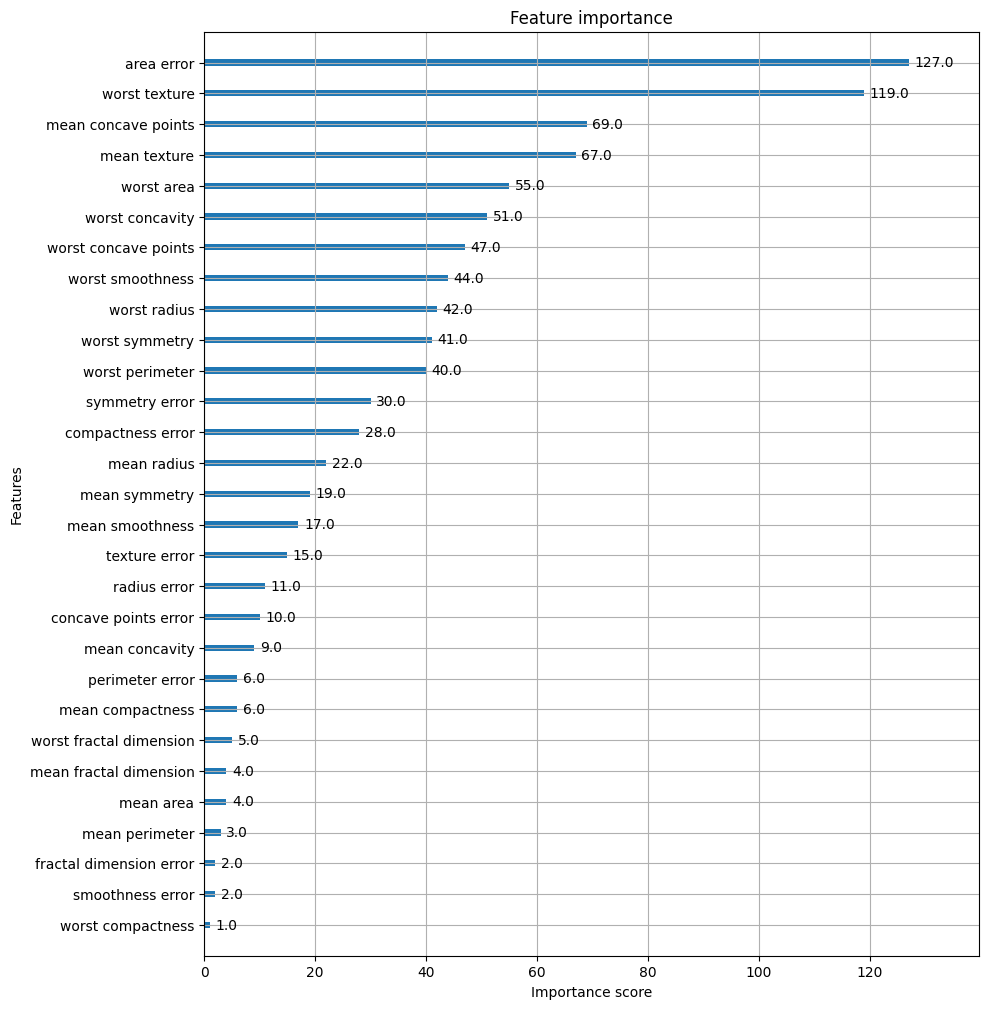

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

결정 트리에서 보여준 트리 기반 규칙 구조도 xgboost에서 시각화할 수 있다. xgboost 모듈의 to_graphviz() API를 이용하면 주피터 노트북에 바로 규칙 트리 구조를 그릴 수 있다. 단, 결정 트리에서와 마찬가지로 Graphviz 프로그램과 패키지가 설치돼 있어야 한다. xgboost.to_graphviz() 내에 파라미터로 학습이 완료된 모델 객체와 Graphviz가 참조할 파일명을 입력해주면 된다.

파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공한다.

xgb.cv의 반환값은 DataFrame 형태이다. 이쯤에서 파이썬 래퍼 XGBoost 모듈에 대한 소개와 사용법을 마치겠다. XGBoost를 위한 사이킷런 래퍼는 사이킷런과 호환돼 편리하게 사용할 수 있기 때문에 앞으로는 예제 코드에 파이썬 래퍼 XGBoost가 아닌 사이킷런 래퍼 XGBoost를 사용하겠다.

# 사이킷런 래퍼 XGBoost의 개요 및 적용
앞에서 잠깐 설명했지만, XGBoost 개발 그룹은 사이킷런의 프레임워크와 연동하기 위해 사이킷런 전용의 XGBoost 래퍼 클래스를 개발했다. 사이킷런의 기본 Estimator를 그대로 상속해 만들었기 때문에 다른 Estimator와 동일하게 fit( )과 predict( )만으로 학습과 예측이 가능하고, GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리티를 그대로 사용할 수 있기 때문에 기존의 다른 머신러닝 알고리즘으로 만들어놓은 프로그램이 있더라도 알고리즘 클래스만 XGboost 래퍼 클래스로 바꾸면 기존 프로그램을 그대로 사용할 수 있다. 사이킷런을 위한 래퍼 XGBoost는 크게 분류를 위한 래퍼 클래스인 XGBClassifier, 회귀를 위한 래퍼 클래스인 XGBRegressor이다.

파이썬 래퍼 XGBoost와 사이킷런 래퍼 XGBoost의 하이퍼 파라미터에 약간의 차이가 있다고 앞에서 잠깐 언급했다. XGBClassifier는 기존 사이킷런에서 일반적으로 사용하는 하이퍼 파라미터와 호환성을 유지하기 위해 기존의 xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇 개를 다음과 같이 변경했다.

* eta — learning_rate
* sub_sample — subsample
* lambda — regjambda
* alpha — reg_alpha

또한 xgboost의 n_estimators와 rmm_boost_ro니nd 하이퍼 파라미터는 서로 동일한 파라미터 이다. 만일 두 개가 동시에 사용되면 파이썬 래퍼 XGBoost API에서는 n_estimators 파라미터를 무시하고 num boost round 파라미터를 적용한다. 하지만 XGBClassifier와 같은 사이킷런 래퍼 XGBoost 클래스에서는 n_esrimators 파라미터를 적용한다.

위스콘신 대학병원의 유방암 데이터 세트를 분류를 위한 래퍼 클래스인 XGBClassifier를 이용해 예측해 보겠다. 모델의 하이퍼 파라미터는 앞의 파이썬 래퍼 XGBoost와 동일하게 n_estimators(num_rounds 대응)는 400, learning_rate(eta 대응)는 0.1, max_depth=3으로 설정하겠다. 앞 파이썬 래퍼 XGBoost 예제를 위해 사용한 주피터 노트북을 이어서 이용하되, 학습 데이터는 앞 예제와 다르게 검증 데이터로 분할되기 이전인 X_train과 y_train을 이용하고 테스트 데이터는 그대로 X_test와 y_test를 사용하겠다. XGBClassifier 클래스의 fit(), predict(), predict_proba()를 이용해 학습과 예측을 수행한다.

In [24]:
# 사이킷런 래퍼 WGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval()를 이용해 사이킷런 래퍼 XGBoost로 만들어진 모델의 예측 성능 평가를 하겠다.



In [26]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도:0.9649,정밀도:0.9620,재현율:0.9870,F1:0.9744, AUC:0.9530


앞 예제의 파이썬 래퍼 XGBoost보다 더 좋은 평가 결과가 나왔다. 이유는 워낙 위스콘신 데이터 세트의 개수가 워낙 작은데, 이전에는 조기 중단을 위해서 최초 학습 데이터인 X_train을 다시 학습용 X_tr과 X_val로 분리하면서 최종 학습 데이터 건수가 작아지기 때문에 발생한 것으로 추정된다. 위스콘신 데이터 세트가 작기 때문에 전반적으로 검증 데이터를 분리하거나 교차 검증등을 적용할 때 성능 수치가 불안정한 모습을 보인다. 하지만 데이터 건수가 많은 경우라면, 원본 학습 데이터를 다시 학습과 검증 데이터로 분리하고 여기에 조기 중단 회수를 적절하게 부여할 경우 일반적으로는 과적합을 개선할 수 있어서 모델 성능이 조금 더 향상될 수 있다.

이번에는 사이킷런 래퍼XGBoost에서 조기 중단을 수행해 보도록 하겠다. 조기 중단 관련한 파라미터를 fit()에 입력하면 된다. 조기 중단 관련 파라미터는 평가 지표가 향상될 수 있는 반복 횟수를 정의하는 early_stopping_rounds, 조기 중단을 위한 평가 지표인 eval_metric, 그리고 성능 평가를 수행할 데이터 세트인 eval_set이다. 파이썬 래퍼 예제와 마찬가지로 최초 학습 데이터에서 다시 분리된 최종 학습 데이터와 검증 데이터를 이용하여 학습과 조기 중단을 적용해 보겠다. early_stopping_rounds를 50, eval_metric은 logloss를 설정하고, eval_set는 파이썬 래퍼일 때와 살짝 다르게 학습과 검증을 의미하는 문자열을 넣어주지 않아도 된다. [(X_tr,y_tr), (X_val, y_val)]와 같이 지정하면 맨 앞의 튜플이 학습용 데이터, 뒤의 튜플이 검증용 데이터로 자동 인식된다.

In [27]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            early_stopping_rounds=50, eval_metric="logloss")
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws50_preds=xgb_wrapper.predict(X_test)
ws50_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

n_estimators가 400이지만 400번을 반복하지 않고 파이썬 래퍼의 조기 중단과 동일하게 176번째 반복에서 학습을 마무리했다. 마찬가지로 126번째 반복에서 검증 데이터 세트의 성능 평가인 validation_1—logloss가 0.25587로 가장 낮았고, 이후 50번 반복까지 더 이상 성능이 향상되지 않았기 때문에 학습이 조기 종료 되었다.

조기 중단으로 학습된 XGBClassifier의 예측 성능을 살펴보겠다. 결과는 파이썬 래퍼의 조기 중단 성능과 동일하다. 앞에서 설명한 대로 위스콘신 데이터 세트가 워낙 작아서, 조기 중단을 위한 검증 데이터를 분리하면 검증 데이터가 없는 학습 데이터를 사용했을 때보다 성능이 약간 저조하다.

In [28]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차행렬
[[35  2]
 [ 2 75]]
정확도:0.9649,정밀도:0.9740,재현율:0.9740,F1:0.9740, AUC:0.9600


하지만 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 크다. 만일 early_stopping_rounds를 10으로 하면 아직 성능이 향상될 여지가 있음에도 불구하고 10번 반복하는 동안 성능 평가지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있다. early_stopping_rounds를 10으로 설정하고 예측 성능을 다시 측정해 보겠다.

In [30]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_tr,y_tr, eval_set=evals, verbose=True)
ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

103번째 반복까지만 수행된 후 학습이 종료됐는데, 103번째 반복의 logloss가 0.25991, 93번째 반복의 logloss가 0.25865로서 10번 반복하는 동안 성능 평가 지수가 향상되지 못해서 더 이상 수행하지 않고 학습이 종료됐다. 이렇게 학습된 모델로 예측한 결과 정확도는 약 0.9474로 early_stopping_rounds=50일 때의 약 0.9561보다 낮다.

피처의 중요도를 시각화하는 모듈인 plotjmportance() API에 사이킷런 래퍼 클래스를 입력해도 앞에서 파이썬 래퍼 클래스를 입력한 결과와 똑같이 시각화 결과를 도출해 준다. 다음 코드를 수행해보면 동일하게 피처 중요도가 시각화됨을 알 수 있다.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

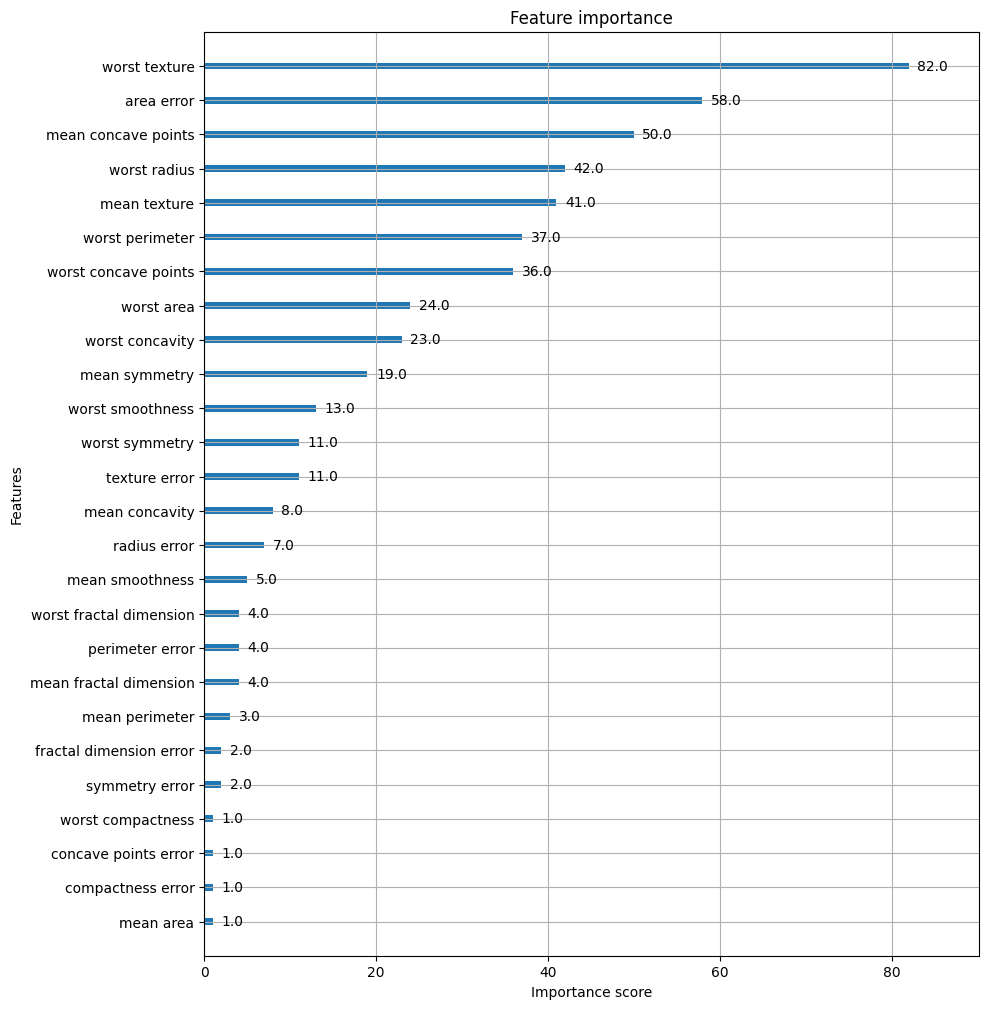

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)